In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#reading the data

haberman= pd.read_csv("haberman.csv",header= None, names=['age', 'year_of_treatment','positive_lymph_nodes', 
                                                          'survival_status_after_5_years'])

In [8]:
haberman.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
haberman.count()
#5 features, each having 306 rows, i.e. 306 values 
# age of patient at the time of operation
# year of treatment(operation)
# Number of positive auxilary nodes detected , at the time of operation
# survival status after 5 years, 1 : Patient survived after 5 years,
                                 #2 : Patient dies withn 5 years

age                              306
year_of_treatment                306
positive_lymph_nodes             306
survival_status_after_5_years    306
dtype: int64

5 features, each having 306 rows, i.e. 306 values 

age of patient at the time of operation

 year of treatment(operation)
    
 Number of positive auxilary nodes detected , at the time of operation

 survival status after 5 years, 1 : Patient survived after 5 years,
                                 2 : Patient dies withn 5 years

In [12]:
haberman.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

In [15]:
haberman['survival_status_after_5_years'].value_counts()

1    225
2     81
Name: survival_status_after_5_years, dtype: int64

Our objective is to predict if patient would survive after 5 years or not based on the given features, 

In [23]:
haberman.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

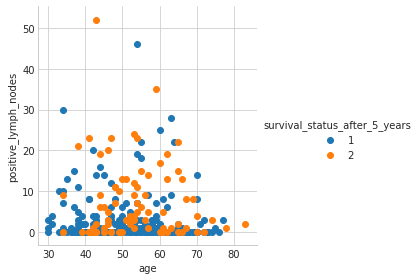

In [26]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='survival_status_after_5_years', size =4) \
.map(plt.scatter, "age", 'positive_lymph_nodes') \
.add_legend()

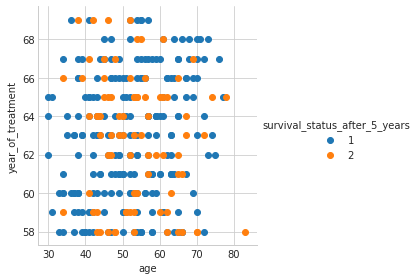

In [27]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='survival_status_after_5_years', size =4) \
.map(plt.scatter, "age", 'year_of_treatment') \
.add_legend()

by only using two variables, its almost impossibe to create a good working model as we cann clear see from the graph , 
above two 

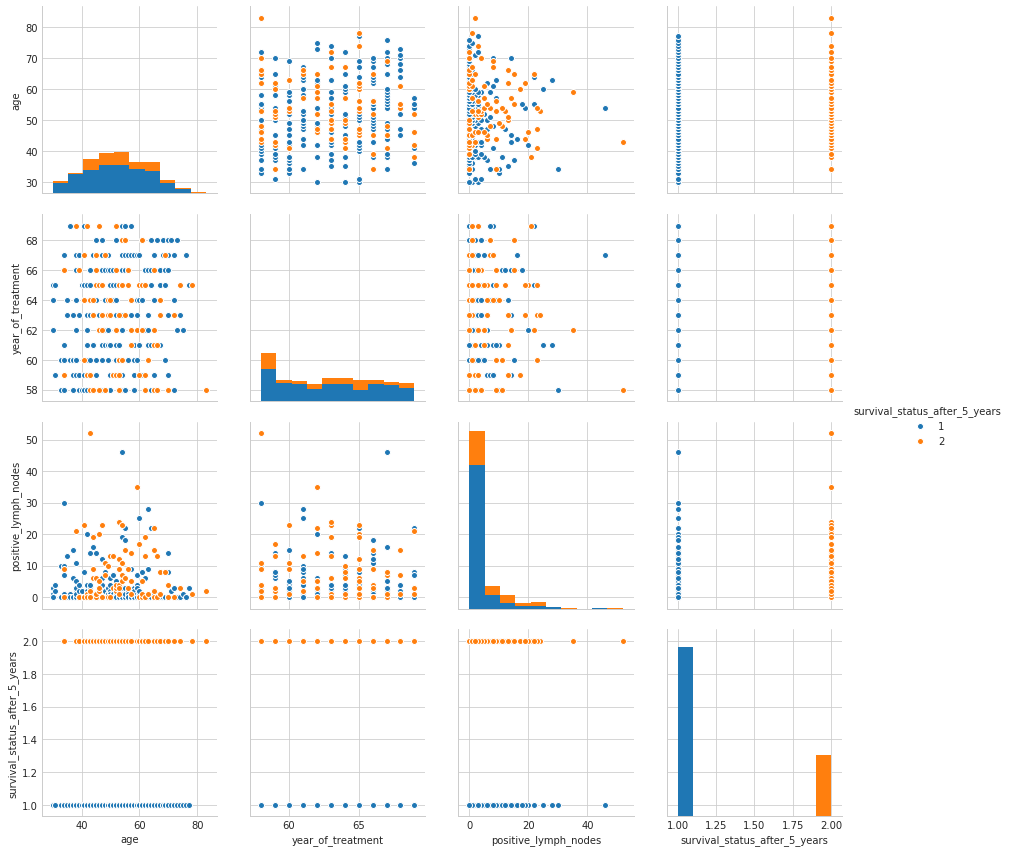

In [19]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='survival_status_after_5_years', size =3)

In [32]:
haberman.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

/home/prajin/Downloads/ENTER/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/prajin/Downloads/ENTER/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


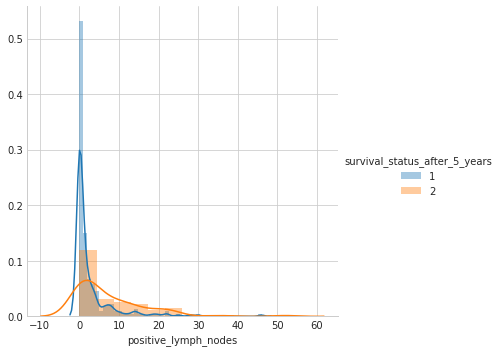

In [34]:
sns.FacetGrid(haberman, hue='survival_status_after_5_years', size =5) \
.map(sns.distplot,'positive_lymph_nodes')\
.add_legend()

it is the histogram , blue one is survived after after years, orange died within 5 years
when positive_lymph_node is 0, maximum number of people survived 


/home/prajin/Downloads/ENTER/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/prajin/Downloads/ENTER/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


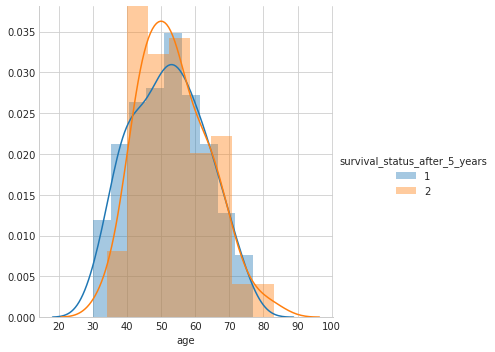

In [35]:
sns.FacetGrid(haberman, hue='survival_status_after_5_years', size =5) \
.map(sns.distplot,'age')\
.add_legend()

this is the histogram , age  feature , it tells  

 people of age between  50-60 moslty survived
    
    similiarly , people of age between 40-45 died within 5 years 

/home/prajin/Downloads/ENTER/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/prajin/Downloads/ENTER/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


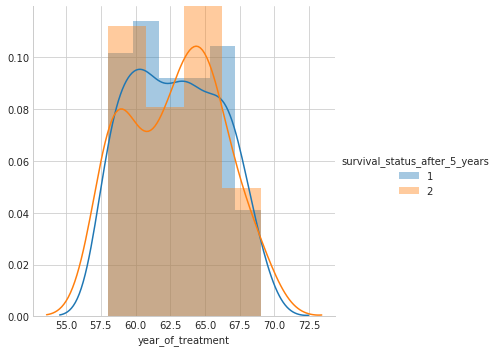

In [36]:
sns.FacetGrid(haberman, hue='survival_status_after_5_years', size =5) \
.map(sns.distplot,'year_of_treatment')\
.add_legend()

# Cummulative distribution Function

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


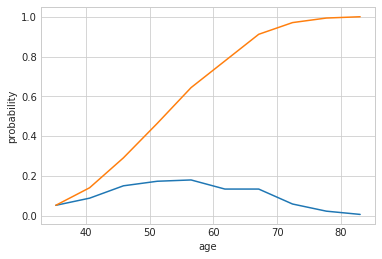

In [45]:
counts , bin_edges = np.histogram(haberman['age'], bins =10, density =True)
pdf = counts/ (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf);
plt.xlabel("age")
plt.ylabel("probability")
plt.show();

from pdf

ther eare 20% people having age between 50-60 

  from cdf 
  
  taking value age =60, there are 78% people less than 60

In [48]:
print("means")
print(np.mean(haberman['age']))
print(np.std(haberman['age']))

#this tells the age of majority of peole, are  between 42 and 62

means
52.45751633986928
10.78578520363183


In [51]:
haberman.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

In [53]:
print("means")
print(np.mean(haberman['year_of_treatment']))
print(np.std(haberman['year_of_treatment']))

#this tells that majority of peole did  treatment betwwen year 1959 and 1965, are  between 42 and 62

means
62.85294117647059
3.244090833563246


In [57]:
print(np.median(haberman['age']))

52.0
